In [2]:
from tensorflow.keras import datasets

mnist = datasets.mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train, X_test = X_train/255, X_test/255

X_train = X_train.reshape((60000, 28, 28, 1))
X_test = X_test.reshape((10000, 28, 28, 1))

In [6]:
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Conv2D(32, kernel_size=(5, 5), strides=(1, 1), 
                  padding='same', activation='relu', input_shape=(28, 28,1)),
    layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    layers.Conv2D(64, (2, 2), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.25),
    layers.Flatten(),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 64)        8256      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 7, 7, 64)          0         
                                                                 
 flatten (Flatten)           (None, 3136)              0

##### 훈련 시작

In [8]:
import time

model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
start_time = time.time()
hist = model.fit(X_train, y_train, epochs=5, verbose=1,
                validation_data=(X_test, y_test))
print('fit time : ', time.time() - start_time)

Epoch 1/5
1875/1875 [==============================] - 84s 45ms/step - loss: 0.1157 - accuracy: 0.9641 - val_loss: 0.0568 - val_accuracy: 0.9807
Epoch 2/5
1875/1875 [==============================] - 85s 45ms/step - loss: 0.0455 - accuracy: 0.9855 - val_loss: 0.0555 - val_accuracy: 0.9810
Epoch 3/5
1875/1875 [==============================] - 85s 45ms/step - loss: 0.0348 - accuracy: 0.9891 - val_loss: 0.0308 - val_accuracy: 0.9910
Epoch 4/5
1875/1875 [==============================] - 119s 64ms/step - loss: 0.0247 - accuracy: 0.9920 - val_loss: 0.0285 - val_accuracy: 0.9915
Epoch 5/5
1875/1875 [==============================] - 148s 79ms/step - loss: 0.0209 - accuracy: 0.9930 - val_loss: 0.0342 - val_accuracy: 0.9889
fit time :  521.7613711357117


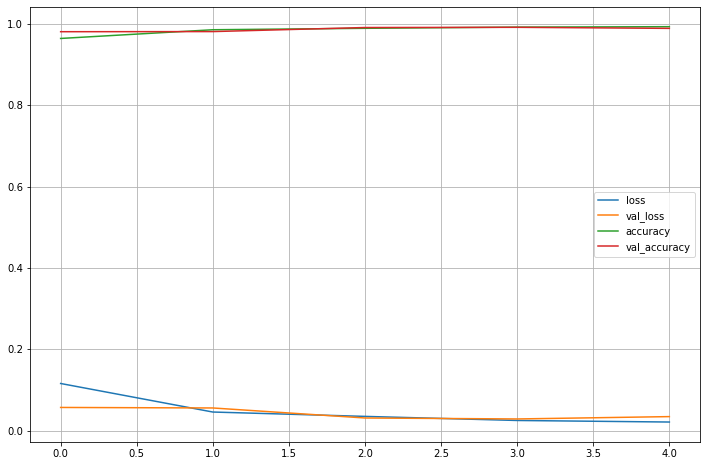

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

plot_target = ['loss', 'val_loss', 'accuracy', 'val_accuracy']
plt.figure(figsize=(12, 8))

for each in plot_target:
    plt.plot(hist.history[each], label=each)
    
plt.legend()
plt.grid()
plt.show()

In [10]:
score = model.evaluate(X_test, y_test)
print('Test loss : ', score[0])
print('Test accuracy : ', score[1])

313/313 [==============================] - 3s 11ms/step - loss: 0.0342 - accuracy: 0.9889
Test loss :  0.03424098715186119
Test accuracy :  0.9889000058174133


In [11]:
import numpy as np

predicted_result = model.predict(X_test)
predicted_labels = np.argmax(predicted_result, axis=1)
predicted_labels[:10]

313/313 [==============================] - 3s 11ms/step


array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=int64)

In [12]:
wrong_result = []

for n in range(0, len(y_test)):
    if predicted_labels[n] != y_test[n]:
        wrong_result.append(n)
        
len(wrong_result)

111

In [13]:
import random

samples = random.choices(population=wrong_result, k=16)
samples

[2035,
 6091,
 2720,
 2896,
 4639,
 4571,
 2414,
 582,
 1790,
 2090,
 2597,
 1709,
 8325,
 813,
 1553,
 4639]

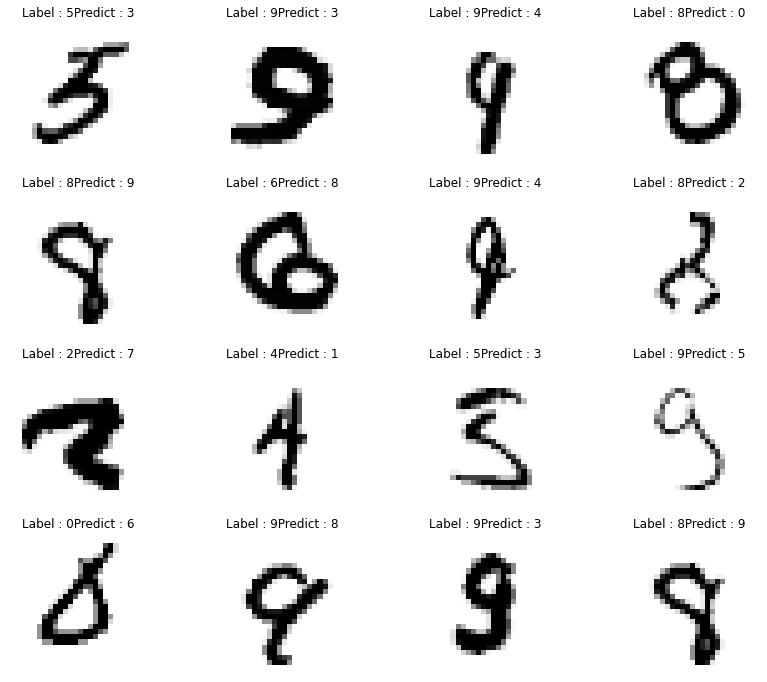

In [14]:
plt.figure(figsize=(14, 12))

for idx, n in enumerate(samples):
    plt.subplot(4, 4, idx+1)
    plt.imshow(X_test[n].reshape(28, 28), cmap='Greys', interpolation='nearest')
    plt.title('Label : ' + str(y_test[n]) + 'Predict : ' + str(predicted_labels[n]))
    plt.axis('off')
    
plt.show()

##### 모델 저장

In [15]:
model.save('MNIST_CNN_model.h5')

## fasion MNIST

In [16]:
from tensorflow.keras import datasets

mnist = datasets.fashion_mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train, X_test = X_train/255, X_test/255

X_train = X_train.reshape((60000, 28, 28, 1))
X_test = X_test.reshape((10000, 28, 28, 1))

In [17]:
import time

model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
start_time = time.time()
hist = model.fit(X_train, y_train, epochs=5, verbose=1,
                validation_data=(X_test, y_test))
print('fit time : ', time.time() - start_time)

Epoch 1/5
1875/1875 [==============================] - 89s 47ms/step - loss: 0.3904 - accuracy: 0.8627 - val_loss: 0.2835 - val_accuracy: 0.8958
Epoch 2/5
1875/1875 [==============================] - 109s 58ms/step - loss: 0.2481 - accuracy: 0.9086 - val_loss: 0.2534 - val_accuracy: 0.9096
Epoch 3/5
1875/1875 [==============================] - 163s 87ms/step - loss: 0.2057 - accuracy: 0.9235 - val_loss: 0.2583 - val_accuracy: 0.9028
Epoch 4/5
1875/1875 [==============================] - 170s 91ms/step - loss: 0.1767 - accuracy: 0.9342 - val_loss: 0.2418 - val_accuracy: 0.9150
Epoch 5/5
1875/1875 [==============================] - 168s 90ms/step - loss: 0.1514 - accuracy: 0.9427 - val_loss: 0.2333 - val_accuracy: 0.9180
fit time :  698.8313810825348


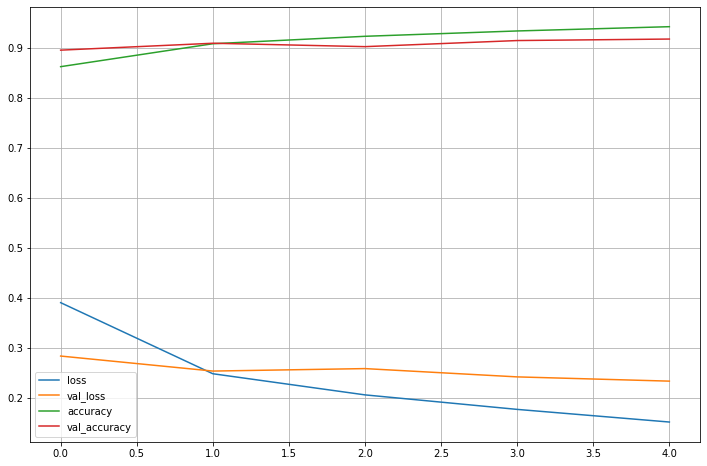

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

plot_target = ['loss', 'val_loss', 'accuracy', 'val_accuracy']
plt.figure(figsize=(12, 8))

for each in plot_target:
    plt.plot(hist.history[each], label=each)
    
plt.legend()
plt.grid()
plt.show()

- loss 값과 val_loss값이 차이가 많이 생기면 과적합을 의심해볼 수 있다.

In [19]:
score = model.evaluate(X_test, y_test)
print('Test loss : ', score[0])
print('Test accuracy : ', score[1])

313/313 [==============================] - 5s 14ms/step - loss: 0.2333 - accuracy: 0.9180
Test loss :  0.23325322568416595
Test accuracy :  0.9179999828338623
